In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [6]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [7]:
xtrain.shape

(60000, 28, 28)

In [8]:
xtest.shape

(10000, 28, 28)

In [9]:
xtrain = xtrain.reshape(60000,28,28,1)
xtest=xtest.reshape(10000,28,28,1)
xtest.shape

(10000, 28, 28, 1)

In [10]:
xtrain.shape

(60000, 28, 28, 1)

In [11]:
xtrain=xtrain/255
xtest= xtest/255

In [12]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(100,activation='relu'))

model.add(Dense(100,activation='relu'))



model.add(Dense(10,activation='softmax'))





C:\LOGS\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(xtrain,ytrain,batch_size=100,epochs=10)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8356 - loss: 0.5414
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9802 - loss: 0.0641
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9866 - loss: 0.0438
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9899 - loss: 0.0323
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9932 - loss: 0.0227
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9936 - loss: 0.0187
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9948 - loss: 0.0160
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9948 - loss: 0.0141
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9959 - loss: 0.0119
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9972 - loss: 0.0092


In [14]:
model.evaluate(xtest,ytest,batch_size=100)

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9867 - loss: 0.0429


[0.034055739641189575, 0.9902999997138977]

withmask withoutmask CNN

In [15]:
import cv2
import os
data_path='data'
categories=os.listdir(data_path)
labels=[i for i in range (len(categories))]
label_dict=dict(zip(categories,labels))
print(label_dict)
print(categories)
print(labels)


{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [16]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)

    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])

        except Exception as e:
           print('Exception: ',e)
       


In [17]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
print(data.shape)

target=np.array(target)

from tensorflow.keras.utils import to_categorical
new_target=to_categorical(target)
print(new_target)

(7552, 100, 100, 1)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [18]:
new_target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [19]:
np.save('data',data)
np.save('target',new_target)

In [20]:
import numpy as np
data=np.load('data.npy')
target=np.load('target.npy')

In [21]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [22]:
model=Sequential()
model.add (Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
  # 1st cnn layers can followed   by relu and MaxPolling     
model.add (Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# 2nd cnn layers can followed   by relu and MaxPolling  

model.add(Flatten())
model.add(Dropout(0.5))
# flatten layer tostack the output convolution from second convolution layer
model.add(Dense(50,activation='relu'))
# dense layer of 50 neurons
model.add(Dense(2,activation='softmax'))
# the final layer with 2 output and 2 categories


In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
pip install scikit-learn

In [25]:
from sklearn.model_selection import train_test_split



In [26]:

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [27]:
checkpoint=ModelCheckpoint('model-{epoch:03d}.keras',monitor='val_loss',verbose=1,save_best_only=True,mode='auto')
histroy= model.fit(train_data,train_target,epochs=5,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 597ms/step - accuracy: 0.5838 - loss: 0.6985
Epoch 1: val_loss improved from inf to 0.54061, saving model to model-001.keras
170/170 ━━━━━━━━━━━━━━━━━━━━ 112s 638ms/step - accuracy: 0.5842 - loss: 0.6982 - val_accuracy: 0.7441 - val_loss: 0.5406
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 580ms/step - accuracy: 0.7590 - loss: 0.5013
Epoch 2: val_loss improved from 0.54061 to 0.37335, saving model to model-002.keras
170/170 ━━━━━━━━━━━━━━━━━━━━ 105s 620ms/step - accuracy: 0.7591 - loss: 0.5011 - val_accuracy: 0.8478 - val_loss: 0.3733
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 554ms/step - accuracy: 0.8419 - loss: 0.3564
Epoch 3: val_loss improved from 0.37335 to 0.33368, saving model to model-003.keras
170/170 ━━━━━━━━━━━━━━━━━━━━ 101s 593ms/step - accuracy: 0.8419 - loss: 0.3563 - val_accuracy: 0.8596 - val_loss: 0.3337
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 583ms/step - accuracy: 0.8820 - loss: 0.2738
Epoch 4: val_loss improved from 0.33368 t

In [28]:
model.save('sabithasulthana.keras')

In [29]:
model=load_model('sabithasulthana.keras')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 98, 98, 200)         │           2,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 98, 98, 200)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 49, 49, 200)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 47, 47, 100)         │         180,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 47, 47, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 23, 23, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 52900)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 52900)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │       2,645,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,481,758 (32.36 MB)

 Trainable params: 2,827,252 (10.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,654,506 (21.57 MB)

In [36]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [32]:
import os
import cv2
from  tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow import keras

In [33]:
model=load_model('sabithasulthana.keras')

In [34]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

h,w= 100,100
img= image.load_img('with_mask_10.jpg',target_size=(100,100,3))
                    
imag= cv2.imread('with_mask_10.jpg')
gray= cv2.cvtColor(np.float32(img),cv2.COLOR_BGR2GRAY)
out=np.expand_dims(gray,axis=0)
final_img=out/255.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
pred= [[0.00709252 0.9929075 ]]
max index:  1
with_mask


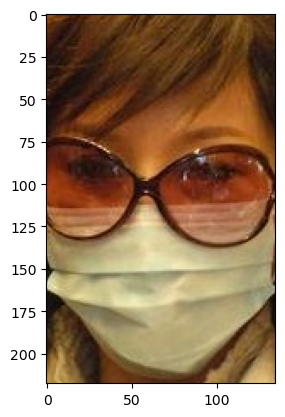

In [35]:
pred= model.predict(final_img)
print('pred=',pred)
max_index=np.argmax(pred[0])
print('max index: ',max_index)
emotions=('without_mask','with_mask')
predicted_emotion=emotions[max_index]
print(predicted_emotion)
plt.imshow(cv2.cvtColor(imag,cv2.COLOR_BGR2RGB))

plt.show()